<a href="https://colab.research.google.com/github/charlie-aashutosh/IIT-JODHPUR-AI-/blob/main/Image_Classification_using_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5] #Array of 2 dimention

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5] #Array of 1 dimention -- flattening takes place

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

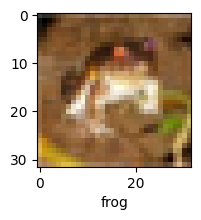

In [10]:
plot_sample(x_train,y_train,0)

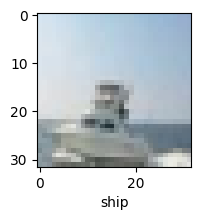

In [11]:
plot_sample(x_train,y_train,100)

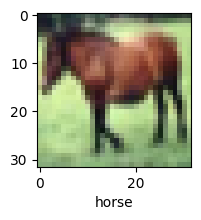

In [12]:
plot_sample(x_train,y_train,7)

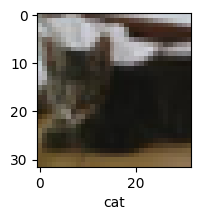

In [13]:
plot_sample(x_train,y_train,9)

In [14]:
#Normalization will take place and the pixel values will be between 0 to 1, by dividing the pixels/255
x_train=x_train/255.0
x_test=x_test/255.0

CNN Model

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #last layer
])

In [16]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', #because we have multiple categories in the o/p
            metrics=['accuracy'])

In [17]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4744 - accuracy: 0.4677
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1136 - accuracy: 0.6091
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9710 - accuracy: 0.6630
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8882 - accuracy: 0.6918
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8212 - accuracy: 0.7174
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7634 - accuracy: 0.7359
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7198 - accuracy: 0.7498
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6742 - accuracy: 0.7658
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6329 - accuracy: 0.7815
Epoch 10/10
1563/1563 [==============================] - 59s 37m

In [18]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9561 - accuracy: 0.6946


[0.9560571312904358, 0.694599986076355]

In [19]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.20586157e-03, 1.07321022e-04, 1.93009723e-03, 9.48241711e-01,
        1.73833774e-04, 4.12455946e-02, 2.43621506e-03, 3.91659023e-06,
        4.64845868e-03, 6.97969290e-06],
       [1.93105792e-04, 7.12294698e-01, 2.07542428e-08, 2.13894999e-08,
        3.15981130e-09, 2.65765787e-09, 3.22353283e-10, 7.08275938e-10,
        2.87306309e-01, 2.05976656e-04],
       [2.00682320e-02, 7.86052883e-01, 1.63349934e-04, 3.11246212e-03,
        3.17092868e-04, 4.25963459e-04, 4.86967547e-05, 1.32578693e-03,
        8.60605463e-02, 1.02424867e-01],
       [3.56201559e-01, 1.24314884e-02, 1.62409116e-02, 9.68450098e-04,
        1.75130763e-03, 6.81979363e-05, 6.00554704e-05, 6.73177128e-05,
        6.10824764e-01, 1.38596201e-03],
       [4.59013791e-06, 4.25419330e-06, 8.05316716e-02, 6.00261092e-02,
        4.23044294e-01, 8.89605551e-04, 4.35483187e-01, 1.30321712e-06,
        1.47915225e-05, 1.79977349e-07]], dtype=float32)

In [20]:
y_classes=[np.argmax(element) for element in y_pred] #index value of elements having max probability
y_classes[:5] #predicted class

[3, 1, 1, 8, 6]

In [21]:
y_test[:5] #actual class

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

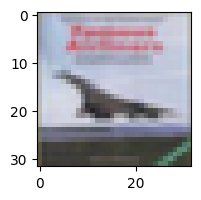

In [22]:
plot_sample(x_test,y_test,3)

In [23]:
classes[y_classes[3]]

'ship'

TypeError: only integer scalar arrays can be converted to a scalar index

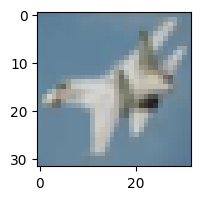

In [24]:
plot_sample(x_test,y_test,10)

In [25]:
classes[y_classes[10]]

'airplane'

TypeError: only integer scalar arrays can be converted to a scalar index

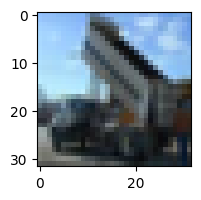

In [26]:
plot_sample(x_test,y_test,50)

In [27]:
classes[y_classes[50]]

'truck'

TypeError: only integer scalar arrays can be converted to a scalar index

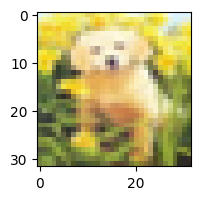

In [28]:
plot_sample(x_test,y_test,190)

In [29]:
classes[y_classes[190]]

'dog'